# Project 1

## Predict whether a mammogram mass is benign or malignant

We'll be using the "mammographic masses" public dataset.

This data contains 961 instances of masses detected in mammograms, and contains the following attributes:


   1. BI-RADS assessment: 1 to 5 (ordinal)  
   2. Age: patient's age in years (integer)
   3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
   4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
   5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
   6. Severity: benign=0 or malignant=1 (binominal)
   
BI-RADS is an assesment of how confident the severity classification is; it is not a "predictive" attribute and so we will discard it. The age, shape, margin, and density attributes are the features that we will build our model with, and "severity" is the classification we will attempt to predict based on those attributes.

Although "shape" and "margin" are nominal data types, which sklearn typically doesn't deal with well, they are close enough to ordinal that we shouldn't just discard them. The "shape" for example is ordered increasingly from round to irregular.

A lot of unnecessary anguish and surgery arises from false positives arising from mammogram results. 

Build a better way to interpret them through supervised machine learning.

## Your assignment

Apply Artificial Neural Network supervised machine learning techniques to this data set and validate it by applying K-Fold cross validation (K=10).

The data needs to be cleaned; many rows contain missing data, and there may be erroneous data identifiable as outliers as well.

Many optimization techniques provide the means of "hyperparameters" to be tuned (e.g. Genetic Algorithms). Once you identify a promising approach, see if you can make it even better by tuning its hyperparameters.

Below it's described the set of steps that outline the development of this project, with some guidance and hints. If you're up for a real challenge, try doing this project from scratch in a new, clean notebook!


## Let's begin: prepare your data

Start by importing the mammographic_masses.data.txt file into a Pandas dataframe (hint: use read_csv) and take a look at it.

In [1]:
import pandas as pd
import numpy as np
from statistics import *
from sklearn.model_selection import train_test_split
data = pd.read_csv("mammographic_masses.data.txt", sep=",", header=None, na_values = '?').astype('float64')

Make sure you use the optional parmaters in read_csv to convert missing data (indicated by a ?) into NaN, and to add the appropriate column names (BI_RADS, age, shape, margin, density, and severity):

In [2]:
data.columns = ["BI-RADS", "Age", "Shape", "Margin", "Density", "Severity"]

Evaluate whether the data needs cleaning; your model is only as good as the data it's given. Hint: use describe() on the dataframe.

In [3]:
data.describe()

,BI-RADS,Age,Shape,Margin,Density,Severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


There are quite a few missing values in the data set. Before we just drop every row that's missing data, let's make sure we don't bias our data in doing so. Does there appear to be any sort of correlation to what sort of data has missing fields? If there were, we'd have to try and go back and fill that data in.

BI-RADS      2
Age          5
Shape       31
Margin      48
Density     76
Severity     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
BI-RADS     959 non-null float64
Age         956 non-null float64
Shape       930 non-null float64
Margin      913 non-null float64
Density     885 non-null float64
Severity    961 non-null float64
dtypes: float64(6)
memory usage: 45.1 KB


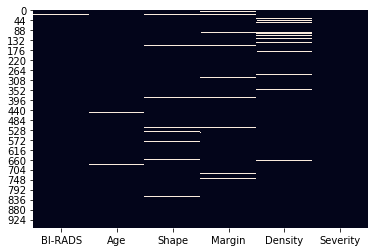

In [4]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

#sb.pairplot(data,hue='Severity')
print(data.isna().sum(axis=0))
sb.heatmap(data.isnull(), cbar=False)
data.info()

If the missing data seems randomly distributed, go ahead and drop rows with missing data. Hint: use dropna().

In [5]:
data = data.dropna()

Next you'll need to convert the Pandas dataframes into numpy arrays that can be used by scikit_learn. Create an array that extracts only the feature data we want to work with (age, shape, margin, and density) and another array that contains the classes (severity). You'll also need an array of the feature name labels.

In [6]:
X = data.drop(['BI-RADS','Severity'], axis=1)
Y = data['Severity']
X=X.reset_index(drop=True)
Y=Y.reset_index(drop=True)

In [7]:
names = data.columns.drop(['BI-RADS','Severity'])

Some of our models require the input data to be normalized, so go ahead and normalize the attribute data. Hint: use preprocessing.StandardScaler().

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.fit_transform(X)
df_feat = pd.DataFrame(scaled_features,columns=names)
X=df_feat

## Neural Networks

You can use Tensorflow to set up a neural network with 1 binary output neuron and see how it performs. Don't be afraid to run a large number of epochs to train the model if necessary. As a bonus, try to optimize this model's hyperparameters using GA.

In [2]:
import tensorflow as tf
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
data.columns

NameError: name 'data' is not defined

In [4]:
age = tf.feature_column.numeric_column("Age")
shape = tf.feature_column.numeric_column("Shape")
margin = tf.feature_column.numeric_column("Margin")
density = tf.feature_column.numeric_column("Density")

feat_cols = [age,shape,margin,density]

## Functions for hyperparameters adjustment

In [12]:
#Função que cria a população inicial
#parameters=[learning_rate,num_nodes,num_hidden_l,activation_fun]
def create_new_population ():
    
    population=[]
    
    for i in range(10):
        cromo=[]
        cromo.append(np.random.uniform(low=10**-2, high=10**-1))
        cromo.append(np.random.choice([1, 2, 4, 8, 16, 32, 64, 128, 256]))
        cromo.append(np.random.randint(low=1, high=20))
        cromo.append(np.random.randint(low=0, high=2))
        population.append(cromo)
        
    return np.array(population)

In [13]:
#Função genérica que atualiza os argumentos do classifier
#parameters=[learning_rate,num_nodes,num_hidden_l,activation_fun]
def update_classifier_parameters (parameters):
    h_u=[]
    for i in range(int(parameters[2])):
        h_u.append(parameters[1])
    
    if((parameters[3]) == 0): a_f = tf.nn.softmax
    if((parameters[3]) == 1): a_f = tf.nn.relu
    if((parameters[3]) == 2): a_f = tf.nn.leaky_relu
    
    classifier = tf.estimator.DNNClassifier(hidden_units=h_u,
                                           n_classes=2,
                                           feature_columns=feat_cols,
                                           #model_dir='C:\\Users\\jose\\Desktop\\RNAmodel',
                                           activation_fn=a_f,
                                           dropout=0.5,
                                           optimizer=tf.train.AdamOptimizer(
                                              learning_rate=parameters[0]
                                           ))
    print(h_u)
    print(type(a_f))
    return classifier

In [14]:
def select_mating_pool(pop, fitness, parents_fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    parents = np.empty((num_parents, pop.shape[1]))
    #parents_fitness=[] - strangely not working good
    for parent_num in range(num_parents):
        #save fitness values of best parents
        parents_fitness.append(np.max(fitness))
        #save best parents
        max_fitness_idx = np.where(fitness == np.max(fitness))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99999999999
        
    return parents

In [15]:
def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually it is at the center.
    crossover_point = np.uint8(offspring_size[1]/2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1)%parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

In [16]:
def mutation(offspring_crossover):
    # Mutation changes a single gene in each offspring randomly.
    for idx in range(offspring_crossover.shape[0]):
        
        # Select which gene to mutate
        select_gene = np.random.randint(low=0, high=4)
        
        if(select_gene == 0):
            #Learning rate mutation
            random_value = np.random.uniform(low=10**-2, high=10**-1)
            offspring_crossover[idx,0] = random_value
        if(select_gene == 1):
            #num_nodes_per_layer mutation
            random_value = np.random.choice([1, 2, 4, 8, 16, 32, 64, 128, 256])
            offspring_crossover[idx,1] = random_value
        if(select_gene == 2):
            #num_hidden_layers
            random_value = np.random.randint(low=1, high=20)
            offspring_crossover[idx,2] = random_value
        if(select_gene == 3):
            #activation function mutation
            random_value = np.random.randint(low=0, high=2)
            offspring_crossover[idx,3] = random_value
            
    return offspring_crossover

## Data split using 10 folds

In [17]:
kf = KFold(n_splits=10)
kf.get_n_splits(X)

10

## Build and validate ANN for a given chromosome

In [18]:
def classify_create_folds(cromossoma):
    fold = 0
    all_test_samples=[]
    predicted_labels=[]
    scores=[]
    
    classifier = update_classifier_parameters(cromossoma)

    for train_index, test_index in kf.split(X):
        fold+=1
        print("Fold#{}".format(fold))

        X_train = X.values[train_index]
        y_train = Y[train_index]
        X_test = X.values[test_index]
        y_test = Y[test_index]

        X_train_df = pd.DataFrame(X_train,columns=names,index=train_index)
        X_test_df = pd.DataFrame(X_test,columns=names,index=test_index)

        #defining input function to feed the classifier with training data
        input_func = tf.estimator.inputs.pandas_input_fn(x=X_train_df,
                                                         y=y_train,
                                                         batch_size=20,
                                                         shuffle=True)
   
        #train the model
        classifier.train(input_fn=input_func,steps=500)

        #defining input function to feed the classifer with testing data
        pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_test_df,
                                                      batch_size=len(X_test_df),
                                                      shuffle=False)

        #make predictions based on testing data
        note_predictions = list(classifier.predict(input_fn=pred_fn))

        #extract the labels
        final_preds=[]
        for pred in note_predictions:
            final_preds.append(pred['class_ids'][0])

        #Adding all accuracy values to an array
        acc = accuracy_score(y_test,final_preds)
        
        scores.append(acc)
        print("Fold-{}".format(fold),"Accuracy#{}".format(acc))

        

    return (scores)

## Hyperparameters otimization using Genetic Algorithm 

In [19]:
new_population = create_new_population()
print(new_population)
num_parents_mating = 5
num_generations = 20
#number of genes for each chromosome
num_genes = 4 
#number of chromosomes for each population
num_chromosomes = 10 
pop_size=(num_chromosomes,num_genes)
#fitness values for each chromosome for the current generation
fitness_values = []
#fitness vaalues for each chromosome of the last generation
last_fitness_values = []
gen = 0
cromo = 0
parents=[]
#Parents fitness so we do not repeat calculations on parents
parents_fitness = []

performances=[]
hiperparametros=[]


for generation in range(num_generations):
    gen+=1
    cromo = 0
    best_perf_per_gen = -1
    
    for cromossoma in new_population:
        cromo+=1
        score=-1
        parentNumber=0
        
        # If it's a known chromosome we dont need to train the ANN again
        # Skips the first generation because we didnt select the parents yet
        for savedCromo in parents:
            parentNumber+=1
            if (np.array_equal(cromossoma,savedCromo)):
                score = parents_fitness[parentNumber-1]
                print(savedCromo, "CROMOSSOMA CONHECIDO")
                print(score, "SCORE CONHECIDO")

        
        #If it's a new chromosome we need to train the ANN in order to get the accuracy
        if (score < 0):
            scores = classify_create_folds(cromossoma)
            score = sum(scores)/len(scores)
            
        print("Generation-{}".format(gen),"Cromossoma-{}".format(cromo),"scored",score)
        #Keep the scores in fitness_values
        fitness_values.append(score)
        
        #getting the best hyperparameters per generation to check the evolution at the end
        if(best_perf_per_gen < score):
            best_perf_per_gen = score
            best_cromo_per_gen = cromossoma
           
        
        
        print(cromossoma)
        
    performances.append(best_perf_per_gen)
    hiperparametros.append(best_cromo_per_gen)
   
    
    print(performances,"MELHORES DE CADA GERAÇÃO")
    print(hiperparametros,"MELHORES ACCURACIES DE CADA GERAÇÃO")
    #We store last generation in other array because fitness_values is changed by the selec_mating_pool
    if(gen == num_generations):
        for i in fitness_values:
            last_fitness_values.append(i)
            
    print(last_fitness_values,"LAST_FITNESS_VALUES")
    parents_fitness=[]
    parents = select_mating_pool(new_population,fitness_values,parents_fitness,num_parents_mating)
    #print(parents)
    # Generating next generation using crossover.
    offspring_crossover = crossover(parents,
                                        offspring_size=(pop_size[0]-parents.shape[0], num_genes))


    # Adding some variations to the offspring using mutation.
    offspring_mutation = mutation(offspring_crossover)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation #mudar para offspring_mutation quando mutation funcionar
    
    #Reset fitness_values
    fitness_values=[]

#Getting the best solution
print(new_population)
best_solution = new_population[last_fitness_values.index(np.max(last_fitness_values))]
print("The best hyperparameters obtained are",best_solution,"with an accuracy of",np.max(last_fitness_values))

    

    
    

[[7.34913072e-02 6.40000000e+01 1.00000000e+00 0.00000000e+00]
 [4.31892722e-02 1.28000000e+02 1.80000000e+01 1.00000000e+00]
 [3.27573561e-02 6.40000000e+01 5.00000000e+00 0.00000000e+00]
 [8.25688469e-02 1.60000000e+01 1.30000000e+01 0.00000000e+00]
 [6.51086621e-02 1.60000000e+01 1.40000000e+01 1.00000000e+00]
 [3.67692830e-02 1.28000000e+02 7.00000000e+00 1.00000000e+00]
 [3.40396693e-02 1.28000000e+02 7.00000000e+00 1.00000000e+00]
 [4.11834582e-02 1.28000000e+02 3.00000000e+00 0.00000000e+00]
 [4.56024453e-02 3.20000000e+01 1.50000000e+01 1.00000000e+00]
 [7.57869210e-02 8.00000000e+00 9.00000000e+00 0.00000000e+00]]
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpgx0p8tbm', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None,

Fold-8 Accuracy#0.8674698795180723
Fold#9
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpgx0p8tbm/model.ckpt-304
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 304 into /tmp/tmpgx0p8tbm/model.ckpt.
INFO:tensorflow:loss = 9.739583, step = 305
INFO:tensorflow:Saving checkpoints for 342 into /tmp/tmpgx0p8tbm/model.ckpt.
INFO:tensorflow:Loss for final step: 4.571894.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpgx0p8tbm/model.ckpt-342
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Fold-9 Accuracy#0.8554216867469879
Fold#10
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Cre

INFO:tensorflow:Saving checkpoints for 228 into /tmp/tmpwugo54nb/model.ckpt.
INFO:tensorflow:loss = 13.828416, step = 229
INFO:tensorflow:Saving checkpoints for 266 into /tmp/tmpwugo54nb/model.ckpt.
INFO:tensorflow:Loss for final step: 4.963768.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpwugo54nb/model.ckpt-266
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Fold-7 Accuracy#0.4939759036144578
Fold#8
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpwugo54nb/model.ckpt-266
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 266 into /tmp/tmpwugo54nb/model.ckpt.
INFO:tensorflow:loss = 13.933349, step = 267
INFO:tensorf

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Fold-5 Accuracy#0.8795180722891566
Fold#6
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpxt9n20_b/model.ckpt-190
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 190 into /tmp/tmpxt9n20_b/model.ckpt.
INFO:tensorflow:loss = 11.707819, step = 191
INFO:tensorflow:Saving checkpoints for 228 into /tmp/tmpxt9n20_b/model.ckpt.
INFO:tensorflow:Loss for final step: 1.9685717.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpxt9n20_b/model.ckpt-228
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Fold-6 Accuracy#0.7469879518072289
Fold#7
INFO:ten

INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 114 into /tmp/tmp3g58eddh/model.ckpt.
INFO:tensorflow:loss = 13.332302, step = 115
INFO:tensorflow:Saving checkpoints for 152 into /tmp/tmp3g58eddh/model.ckpt.
INFO:tensorflow:Loss for final step: 5.3425236.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp3g58eddh/model.ckpt-152
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Fold-4 Accuracy#0.43373493975903615
Fold#5
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp3g58eddh/model.ckpt-152
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 152 into /tmp/tmp3g58eddh/model.ckpt.
INFO:tensor

INFO:tensorflow:Restoring parameters from /tmp/tmpyrfftoie/model.ckpt-76
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Fold-2 Accuracy#0.42168674698795183
Fold#3
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpyrfftoie/model.ckpt-76
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 76 into /tmp/tmpyrfftoie/model.ckpt.
INFO:tensorflow:loss = 783.166, step = 77
INFO:tensorflow:Saving checkpoints for 114 into /tmp/tmpyrfftoie/model.ckpt.
INFO:tensorflow:Loss for final step: 4.9424105.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpyrfftoie/model.ckpt-114
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done runn

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpdzwwfxmy/model.ckpt.
INFO:tensorflow:loss = 13.618541, step = 1
INFO:tensorflow:Saving checkpoints for 38 into /tmp/tmpdzwwfxmy/model.ckpt.
INFO:tensorflow:Loss for final step: 4.9233794.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpdzwwfxmy/model.ckpt-38
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Fold-1 Accuracy#0.46987951807228917
Fold#2
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpdzwwfxmy/model.ckpt-38
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 38 into /tmp/tmpd

INFO:tensorflow:Restoring parameters from /tmp/tmpdzwwfxmy/model.ckpt-380
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Fold-10 Accuracy#0.5180722891566265
Generation-1 Cromossoma-6 scored 0.5301204819277109
[3.6769283e-02 1.2800000e+02 7.0000000e+00 1.0000000e+00]
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpd6guapfv', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f9d380aa5c0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
[128.0, 128.0, 12

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 304 into /tmp/tmpd6guapfv/model.ckpt.
INFO:tensorflow:loss = 13.840574, step = 305
INFO:tensorflow:Saving checkpoints for 342 into /tmp/tmpd6guapfv/model.ckpt.
INFO:tensorflow:Loss for final step: 4.8229847.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpd6guapfv/model.ckpt-342
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Fold-9 Accuracy#0.5060240963855421
Fold#10
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpd6guapfv/model.ckpt-342
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 342 into /

INFO:tensorflow:Restoring parameters from /tmp/tmptvvattc1/model.ckpt-266
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Fold-7 Accuracy#0.7469879518072289
Fold#8
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmptvvattc1/model.ckpt-266
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 266 into /tmp/tmptvvattc1/model.ckpt.
INFO:tensorflow:loss = 9.9426365, step = 267
INFO:tensorflow:Saving checkpoints for 304 into /tmp/tmptvvattc1/model.ckpt.
INFO:tensorflow:Loss for final step: 3.502218.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmptvvattc1/model.ckpt-304
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done 

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 190 into /tmp/tmpad74xw3u/model.ckpt.
INFO:tensorflow:loss = 1170.5459, step = 191
INFO:tensorflow:Saving checkpoints for 228 into /tmp/tmpad74xw3u/model.ckpt.
INFO:tensorflow:Loss for final step: 4.7289085.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpad74xw3u/model.ckpt-228
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Fold-6 Accuracy#0.5662650602409639
Fold#7
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpad74xw3u/model.ckpt-228
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 228 into /t

KeyboardInterrupt: 

## Debug stuff

In [20]:
new_population = create_new_population()
print(new_population)
fitness_values=[]
for i in range(10):
    fitness_values.append(np.random.uniform(low=0, high=1))

print(fitness_values.index(np.max(fitness_values)))

[[2.76535666e-02 4.00000000e+00 1.10000000e+01 0.00000000e+00]
 [1.96586581e-02 1.00000000e+00 9.00000000e+00 1.00000000e+00]
 [6.23761799e-02 4.00000000e+00 1.50000000e+01 1.00000000e+00]
 [3.76043618e-02 3.20000000e+01 1.00000000e+01 0.00000000e+00]
 [2.17342594e-02 1.00000000e+00 1.70000000e+01 0.00000000e+00]
 [9.20114948e-02 8.00000000e+00 6.00000000e+00 0.00000000e+00]
 [5.29019728e-02 4.00000000e+00 6.00000000e+00 0.00000000e+00]
 [1.18874322e-02 1.28000000e+02 1.20000000e+01 1.00000000e+00]
 [1.19458409e-02 1.00000000e+00 1.10000000e+01 1.00000000e+00]
 [9.45737037e-02 1.60000000e+01 1.20000000e+01 0.00000000e+00]]
1


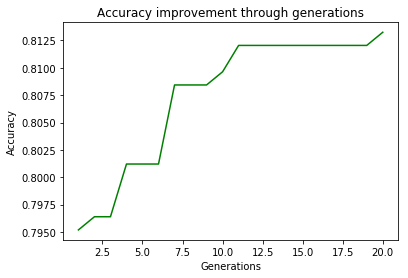

In [21]:
accs=[0.7951807228915662, 0.7963855421686746, 0.7963855421686746, 0.8012048192771084, 0.8012048192771084, 0.8012048192771084, 0.8084337349397591, 0.8084337349397591, 0.8084337349397591, 0.8096385542168674, 0.8120481927710843, 0.8120481927710843, 0.8120481927710843, 0.8120481927710843, 0.8120481927710843, 0.8120481927710843, 0.8120481927710843, 0.8120481927710843, 0.8120481927710843, 0.8132530120481928]
gen=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.plot(gen,accs,color='g')
plt.xlabel('Generations')
plt.ylabel('Accuracy')
plt.title('Accuracy improvement through generations')
plt.show()